In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import h5py   
from matplotlib.colors import LogNorm, Normalize
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

In [2]:
def deltat(time,ch1,ch2):
    half1= max(ch1)/2
    half2= max(ch2)/2
    i=0
    while ch1[i]<half1:
        i=i+1
    j=0
    while ch2[j]<half2:
        j=j+1
    t1= time[i]
    t2= time[j]
    dt= time[j]-time[i]
    return dt, t1 ,t2

def tot(time, ch):
    half= (max(ch)-min(ch))/2 + min(ch) #find half point of the rise
    i=0
    while ch[i]<half: #find the element which is higher then the halfpoint
        i=i+1
    x1= [time[i-1],time[i]]
    y1= [ch[i-1],ch[i]]
    xnew1= np.linspace(time[i-1],time[i],200)
    f1 = interp1d(x1, y1)#linearly interpolate of these two points
    ynew1= f1(xnew1)
    k=0
    while ynew1[k]<half:
        k=k+1#find the right point of the interpolation
    j=i+2 #no do the same for the falling edge
    while ch[j]>half:
        j=j+1
    
    x2= [time[j-1],time[j]]
    y2= [ch[j-1],ch[j]]
    xnew2= np.linspace(time[j-1],time[j],200)
    f2 = interp1d(x2, y2)
    ynew2= f2(xnew2)
    z=0
    while ynew2[z]<half:
        z=z+1
    tott= xnew2[z]- xnew1[k]#calculate the tot
    return tott

In [3]:
a=glob.glob("/data/detrd/ukraemer/osci_data/20221129_lasScan_P2_4V_A2_6V_B100V_W10ns/*")

a= sorted(a)

len(a)/64

205.4375

In [4]:
pixelnames=[]
temp=[]
for i in range(len(a)):
    if i==0:
        temp.append(a[i])
    elif a[i]==a[-1]:
        temp.append(a[i])
        pixelnames.append(temp)
    elif a[i][88:100]==a[i-1][88:100]:
        temp.append(a[i])
    else:
        pixelnames.append(temp)
        temp=[]
        temp.append(a[i])

In [5]:
temp=[]
for i in range(3):
    f= h5py.File(a[i])
    temp.append(f)

In [6]:
np.shape(pixelnames)

/opt/tljh/user/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(64,)

In [7]:

temp= h5py.File(pixelnames[4][100])

In [7]:
len(pixelnames[1])

204

In [9]:
def rising_edge(data, thresh):
    sign = data >= thresh
    pos = np.where(np.convolve(sign, [1, -1]) == 1)
    return pos

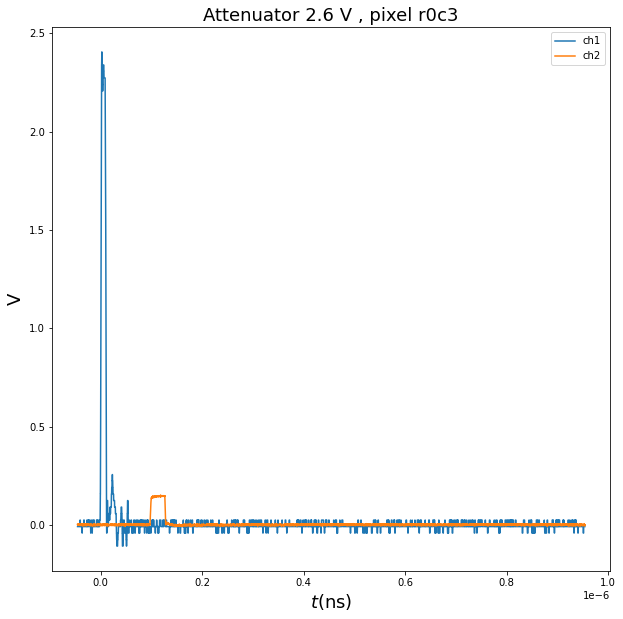

In [10]:
ch1= temp['Voltage_CHAN1']
ch1= np.array(ch1)
ch2= temp["Voltage_CHAN2"]
ch2= np.array(ch2)


time=temp["Time"]

fig = plt.figure(figsize=(10,10))
plt.plot(time[0:-1],ch1[0:-1], label="ch1")
plt.plot(time[0:-1],ch2[0:-1], label="ch2")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("Attenuator 2.6 V , pixel r0c3",fontsize=18)
plt.ylabel("V",fontsize=18)
#plt.savefig("ex1")
plt.show()

In [17]:
len(multipeak)

7

In [11]:
%%time
pixelsdt=[]
pixelstot=[]
empty1=[]
multipeak=[]

for i in range(len(pixelnames)):
    temp2=[]
    temp3=[]
    for j in range(len(pixelnames[i])):
        temp1=h5py.File(pixelnames[i][j])
        ch1= temp1["Voltage_CHAN1"]
        ch1= np.array(ch1)
        ch2= temp1["Voltage_CHAN2"]
        ch2= np.array(ch2)
        if len(rising_edge(ch2,0.06)[0])==2:
            multipeak.append(len(rising_edge(ch2,0.08)[0]))
        if 0.04>=max(ch2):
            empty1.append(1)
        if len(rising_edge(ch2,0.06)[0])==1:
            dt,t2,t3 =deltat(time,ch1,ch2)
            temp2.append(dt)
            temp3.append(tot(time,ch2))
        temp1.close()
    pixelsdt.append(temp2)
    pixelstot.append(temp3)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
CPU times: user 3min 17s, sys: 3.29 s, total: 3min 21s
Wall time: 7min 24s


In [12]:
datafile=[]

for i in range(len(pixelstot)):
    temp=[]
    for j in range(len(pixelstot[i])):
        temp.append(pixelstot[i][j])
    datafile.append(temp)
    
datafile= np.transpose(datafile)

np.savetxt("lasScan_P2_4V_A2_6V_B100V_W10ns_tot",datafile, fmt='%s')

/opt/tljh/user/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [13]:
datafile1=[]

for i in range(len(pixelsdt)):
    temp=[]
    for j in range(len(pixelsdt[i])):
        temp.append(pixelsdt[i][j])
    datafile1.append(temp)
    
datafile1= np.transpose(datafile1)

np.savetxt("lasScan_P2_4V_A2_6V_B100V_W10ns_deltat",datafile1, fmt='%s')



In [14]:
64*200-6150


6650